[2017-05-15 10:29:20,874] Making new env: FrozenLake-v0



SFFF
FHFH
FFFH
HFFG
Success rate: 0.478


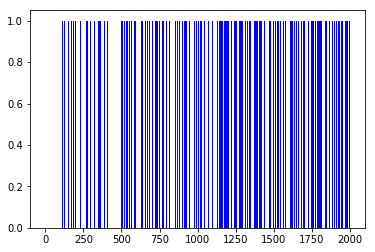

In [1]:
import gym
import numpy as np
import matplotlib.pyplot as plt
import time
import tensorflow as tf

env = gym.make('FrozenLake-v0')
env.render()

ont_hot_array = [[16]]

def init_array(x):
    global one_hot_array
    one_hot_array = np.identity(x)
    
def get_one_hot(x):
    return one_hot_array[x:x + 1]


def playgame() :
    input_size = env.observation_space.n #16 one-hot
    output_size = env.action_space.n  #4 actions
    learning_rate = 0.1
    
    X = tf.placeholder(shape=[1,input_size],dtype=tf.float32)
    W = tf.Variable(tf.random_uniform([input_size, output_size], 0, 0.01))
    #Q prediction : X * W
    # cost(W) = (Ws - y)^2
    Qpred = tf.matmul(X,W)  #==> Ws
    # Y label
    Y = tf.placeholder(shape=[1, output_size], dtype=tf.float32)

    loss = tf.reduce_sum(tf.square(Y-Qpred))   #cost(W)
    train = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(loss)

    num_episodes = 2000
    dis = 0.99  # discount factor

    rList = []

    init = tf.global_variables_initializer()
    with tf.Session() as sess:
        sess.run(init)

        for i in range(num_episodes):
            s = env.reset()
            e = 1. / ((i / 50) + 10)
            rAll = 0
            done = False
            local_loss = []

            while not done:
                #print("state %d"%state)
                Qs = sess.run(Qpred, feed_dict={X: get_one_hot(s)})
                if np.random.rand(1) < e:    # decaying E-greedy
                    action = env.action_space.sample()
                else:
                    action = np.argmax(Qs)

                # Get new state and reward from environment
                s1, reward, done,_ = env.step(action)
                if done:
                    Qs[0, action] = reward
                else :
                    Qs1 = sess.run(Qpred, feed_dict={X: get_one_hot(s1)})   # <== just like Q-table
                    Qs[0, action] = reward + dis*np.max(Qs1)

                sess.run(train, feed_dict={X: get_one_hot(s), Y: Qs})

                rAll += reward
                s = s1

            rList.append(rAll)

    print("Success rate: %.3f"%(sum(rList)/num_episodes))
    #print("Final Q-Table Values")
    #print("LEFT DOWN RIGHT UP")
    #print(Q)
    plt.bar(range(len(rList)), rList, color="blue")
    plt.show()

init_array(16)
playgame()